In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import os
from PIL import Image
import pickle

In [2]:
train_path='../Training'
test_path='../Validation'

train_male='../Training/male'
train_female='../Training/female'

test_male='../Validation/male'
test_female='../Validation/female'

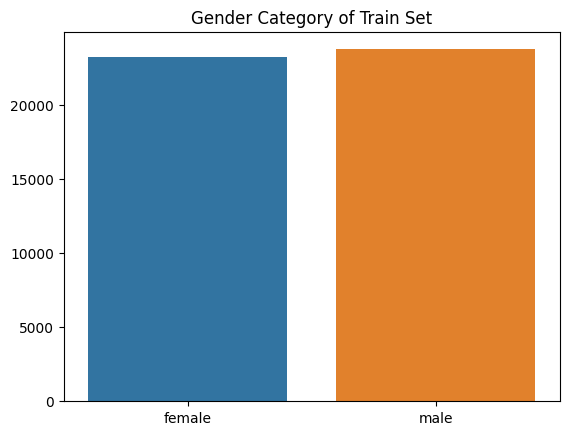

In [3]:
category_names = os.listdir(train_path)
num_category_names =len(category_names)
train_images = []
for category in category_names:
    folder = train_path +"/"+ category
    train_images.append(len(os.listdir(folder)))

g = sns.barplot(x=category_names,y=train_images)
g.set_title("Gender Category of Train Set");

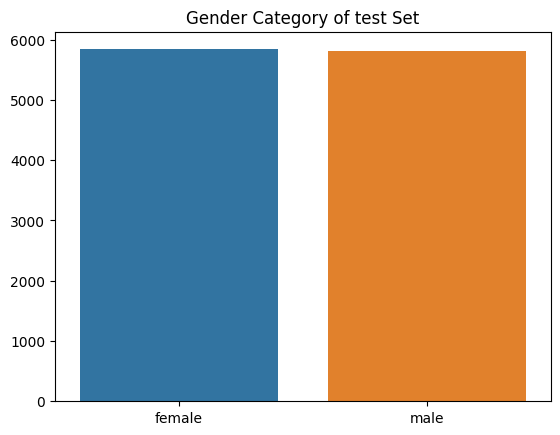

In [4]:
test_images = []
for category in category_names:
    folder = test_path +"/"+ category
    test_images.append(len(os.listdir(folder)))

g = sns.barplot(x=category_names,y=test_images)
g.set_title("Gender Category of test Set");

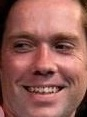

In [5]:
Image.open('../Training/male/090544.jpg.jpg')

In [6]:
male_train=[]
label = []
for i in os.listdir(train_male):
    if os.path.isfile(train_male+ "/" + i):
        males = Image.open(train_male+"/"+i).convert("L")
        males = males.resize((50,50),Image.ANTIALIAS)
        
        males = np.asarray(males)/255.0
        male_train.append(males)
        label.append(1)


female_train = []
for i in os.listdir(train_female):
    if os.path.isfile(train_female+ "/" + i):
        females = Image.open(train_female+ "/" + i)
        females = females.resize((50,50),Image.ANTIALIAS).convert("L")
        
        females = np.asarray(females)/255.0 
        
        female_train.append(females)
        label.append(0)

In [7]:
x_train = np.concatenate((male_train,female_train),axis=0)
y_train = np.asarray(label)
y_train = y_train.reshape(x_train.shape[0],1)

In [8]:
print("Woman Faces",np.shape(female_train),"Man Faces",np.shape(male_train))
print("Train Dataset",x_train.shape,"Train Values",y_train.shape)

Woman Faces (23243, 50, 50) Man Faces (23766, 50, 50)
Train Dataset (47009, 50, 50) Train Values (47009, 1)


In [9]:
male_test = []
label2 = []
for i in os.listdir(test_male):
    if os.path.isfile(test_male+ "/" + i):
        male_face = Image.open(test_male+ "/" + i).convert("L")
        male_face = male_face.resize((50,50),Image.ANTIALIAS)
        
        male_face = np.asarray(male_face)/255.0
        male_test.append(male_face)
        label2.append(1)

female_test = []
for i in os.listdir(test_female):
    if os.path.isfile(test_female+"/"+i):
        female_face = Image.open(test_female+"/"+i).convert("L")
        female_face = female_face.resize((50,50),Image.ANTIALIAS)
        
        female_face = np.asarray(female_face)/255.0
        female_test.append(female_face)
        label2.append(0)


In [10]:
x_test = np.concatenate((male_test,female_test),axis=0)
y_test = np.asarray(label2)
y_test = y_test.reshape(x_test.shape[0],1)

In [11]:
print("Man Faces",np.shape(male_test),"Female Faces",np.shape(female_test))
print("Test Dataset",x_test.shape,"Test Dataset Values",y_test.shape)

Man Faces (5808, 50, 50) Female Faces (5841, 50, 50)
Test Dataset (11649, 50, 50) Test Dataset Values (11649, 1)


In [12]:
x = np.concatenate((x_train,x_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

x = x.reshape(x.shape[0],x.shape[1]*x.shape[2])

In [13]:
print("x shape:{}\ny shape{}".format(x.shape,y.shape))

x shape:(58658, 2500)
y shape(58658, 1)


In [14]:
#Split Data with train_test_split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [19]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x_train:{}\nx_test:{}\ny_train:{}\ny_test:{}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

x_train:(2500, 46926)
x_test:(2500, 11732)
y_train:(1, 46926)
y_test:(1, 11732)


In [21]:
## Weights and Bias Initializing
def w_b_initialize(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
    
### Sigmoid Function
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


### Forward Backward Propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # Forward Propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -(1-y_train)*np.log(1-y_head)-y_train*np.log(y_head)
    cost = np.sum(loss)/ x_train.shape[1] # x_train.shape[1] for scaling
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]# x_train.shape[1] for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]# x_train.shape[1] for scaling
    
    gradients = {"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost, gradients

### Update
def update(w, b, x_train, y_train, learning_rate, num_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    # update parameters is num_iterations times
    for i in range(num_iterations):
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i %50 ==0:
            index.append(i)
            cost_list2.append(cost)
            print("After {} iteration cost: {}".format(i,cost))
    
    parameters = {"weights":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters     

### Predict
def predict(w, b, x_test):
    z = np.dot(w.T,x_test) + b
    y_head = sigmoid(z)
    
    y_prediction  = np.zeros((1,x_test.shape[1]))
    
    for i in range(x_test.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0:i] == 0
        else:
            y_prediction[0:i] == 1
            
    return y_prediction

### Logistic Regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):

    w,b = w_b_initialize(x_train.shape[0])

    parameters = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weights"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weights"], parameters["bias"], x_train)

    test_accuracy = 100 - np.mean(np.abs(y_prediction_train - y_train)*100)
    train_accuracy = 100 - np.mean(np.abs(y_prediction_test - y_test)*100)
    
    # print("Test Accuracy :%{:.2f} ".format(test_accuracy))
    # print("Train Accuracy:%{:.2f} ".format(train_accuracy))

    return parameters

In [29]:
from keras.models import Sequential

2023-04-23 23:36:03.989581: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-23 23:36:05.681935: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 23:36:13.119712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 23:36:13.147881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 23:36:42.376517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [30]:
model = Sequential()
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

After 0 iteration cost: 6.63074721022076
After 50 iteration cost: 0.6014073933527092
After 100 iteration cost: 0.5733217623626418
After 150 iteration cost: 0.5540623792767558
After 200 iteration cost: 0.5389863072482949
After 250 iteration cost: 0.5265522844924975
After 300 iteration cost: 0.5160039872316956
After 350 iteration cost: 0.5068806698687
After 400 iteration cost: 0.4988715582824496
After 450 iteration cost: 0.49175584573578807


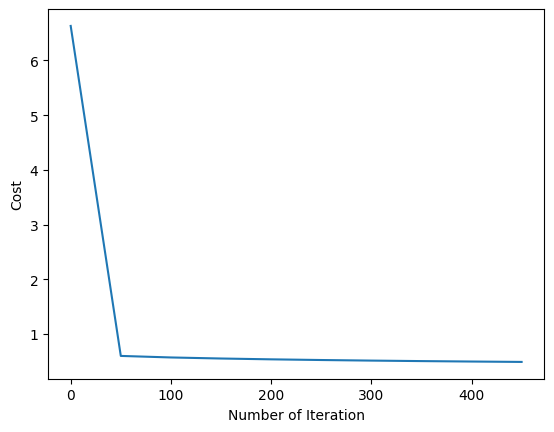

ValueError: Failed to find data adapter that can handle input: (<class 'dict'> containing {"<class 'str'>"} keys and {"<class 'numpy.ndarray'>", "<class 'numpy.float64'>"} values), <class 'NoneType'>

In [31]:
model.fit(logistic_regression(x_train, y_train, x_test, y_test, 0.01, 500))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
log_reg = LogisticRegression().fit(X_train,Y_train)

In [25]:
print("Accuracy Score Train: %{:.2f} ".format(accuracy_score(log_reg.predict(X_train),Y_train)*100))
print("Accuracy Score Test: %{:.2f} ".format(accuracy_score(log_reg.predict(X_test),Y_test)*100))

Accuracy Score Train: %86.32 
Accuracy Score Test: %85.84 


In [26]:
def predict_image(w, b, x_test):
    z = np.dot(w.T,x_test) + b
    y_head = sigmoid(z)
    
    if y_head <= 0.5:
        y_prediction = 0
    else:
        y_prediction = 1
        
    return y_prediction


In [27]:
img = Image.open('../Training/male/090544.jpg.jpg')
img = img.convert("L").resize((50, 50))
img = np.asarray(img) / 255.0
img = img.reshape((1, -1)).T

dimension = 2500
w, b = w_b_initialize(dimension)

y_pred = predict_image(w, b, img)
print(y_pred)


1


In [ ]:
with open('model.pickle', 'wb') as f:
    pickle.dump(classification_modal, f)

: 